<a href="https://colab.research.google.com/github/lokeshreddiee/Task_Completion/blob/main/CMPE_255_GROUP_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Credit Card Hazard Prediction

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
from sklearn.preprocessing import OneHotEncoder

In [3]:
from sklearn.metrics import balanced_accuracy_score

In [4]:
import os
import subprocess
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NeighbourhoodCleaningRule
from imblearn.under_sampling import NearMiss
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.decomposition import PCA, KernelPCA
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import cohen_kappa_score
from sklearn import metrics
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
import pickle

Reading the data from credit risk dataset

In [5]:
credit_base = pd.read_csv('credit_risk_dataset.csv')

In [6]:
credit_base.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [7]:
credit_base.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


## Exploratory data analysis

# Univariate analysis of continuous variables

In [8]:
measures_df = credit_base.select_dtypes(include='number')

In [9]:
measures_df

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
0,22,59000,123.0,35000,16.02,1,0.59,3
1,21,9600,5.0,1000,11.14,0,0.10,2
2,25,9600,1.0,5500,12.87,1,0.57,3
3,23,65500,4.0,35000,15.23,1,0.53,2
4,24,54400,8.0,35000,14.27,1,0.55,4
...,...,...,...,...,...,...,...,...
32576,57,53000,1.0,5800,13.16,0,0.11,30
32577,54,120000,4.0,17625,7.49,0,0.15,19
32578,65,76000,3.0,35000,10.99,1,0.46,28
32579,56,150000,5.0,15000,11.48,0,0.10,26


In [10]:
measures_df.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,32581.000000,3.258100e+04,31686.000000,32581.000000,29465.000000,32581.000000,32581.000000,32581.000000
mean,27.734600,6.607485e+04,4.789686,9589.371106,11.011695,0.218164,0.170203,5.804211
std,6.348078,6.198312e+04,4.142630,6322.086646,3.240459,0.413006,0.106782,4.055001
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.850000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.500000e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,7.920000e+04,7.000000,12200.000000,13.470000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


In [11]:
columns = list(measures_df.columns)
columns.remove('loan_status')
columns

['person_age',
 'person_income',
 'person_emp_length',
 'loan_amnt',
 'loan_int_rate',
 'loan_percent_income',
 'cb_person_cred_hist_length']

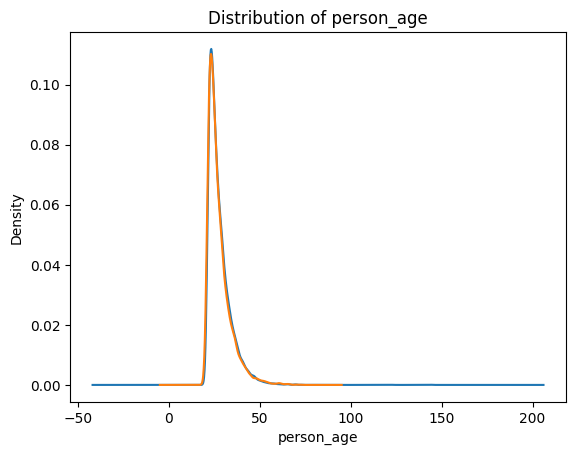

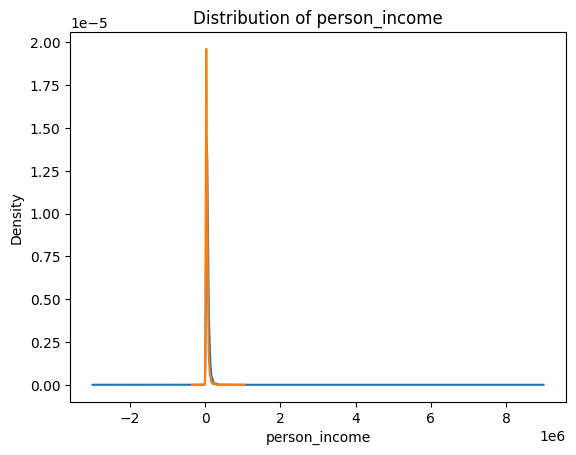

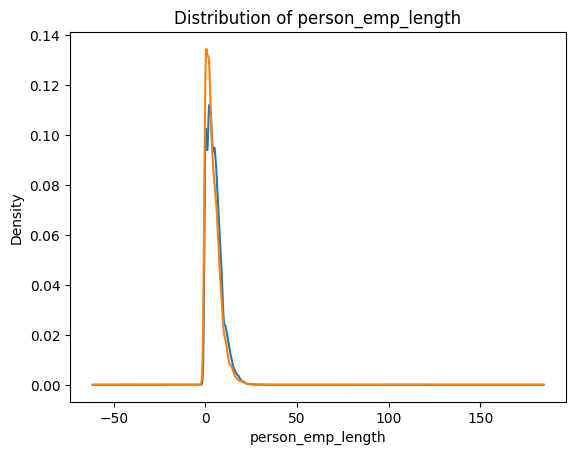

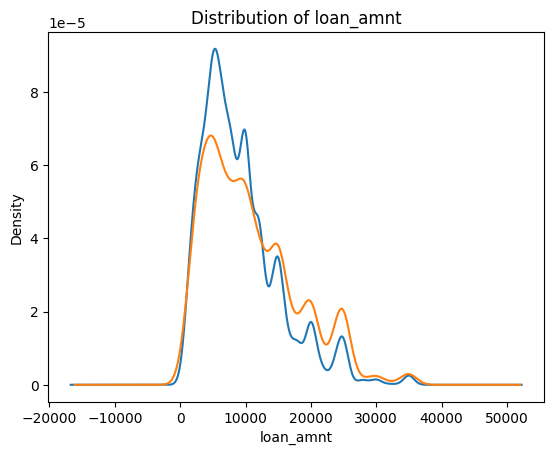

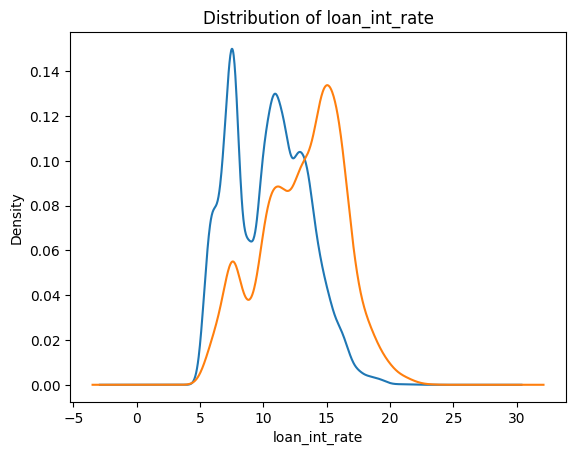

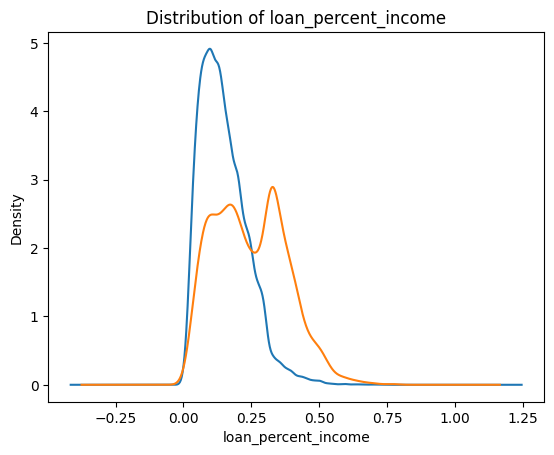

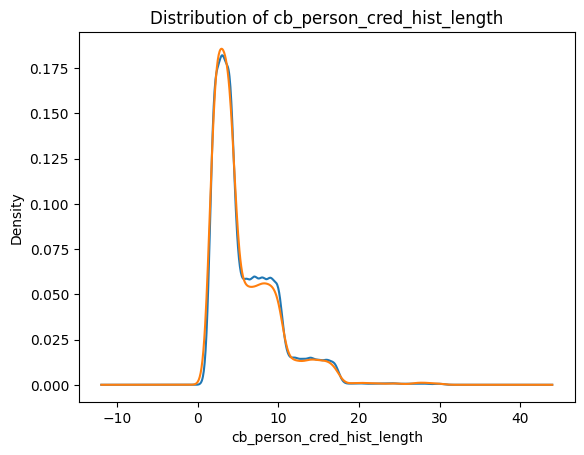

In [12]:
grpby = credit_base.groupby('loan_status')
for col in columns:
    plt.figure()
    grpby[col].plot(kind='kde')
    x = col
    plt.xlabel(x)
    y = 'Density'
    plt.ylabel(y)
    plt.title('Distribution of {xLabel}'.format(xLabel=x))

# Numerical features based bivariate analysis

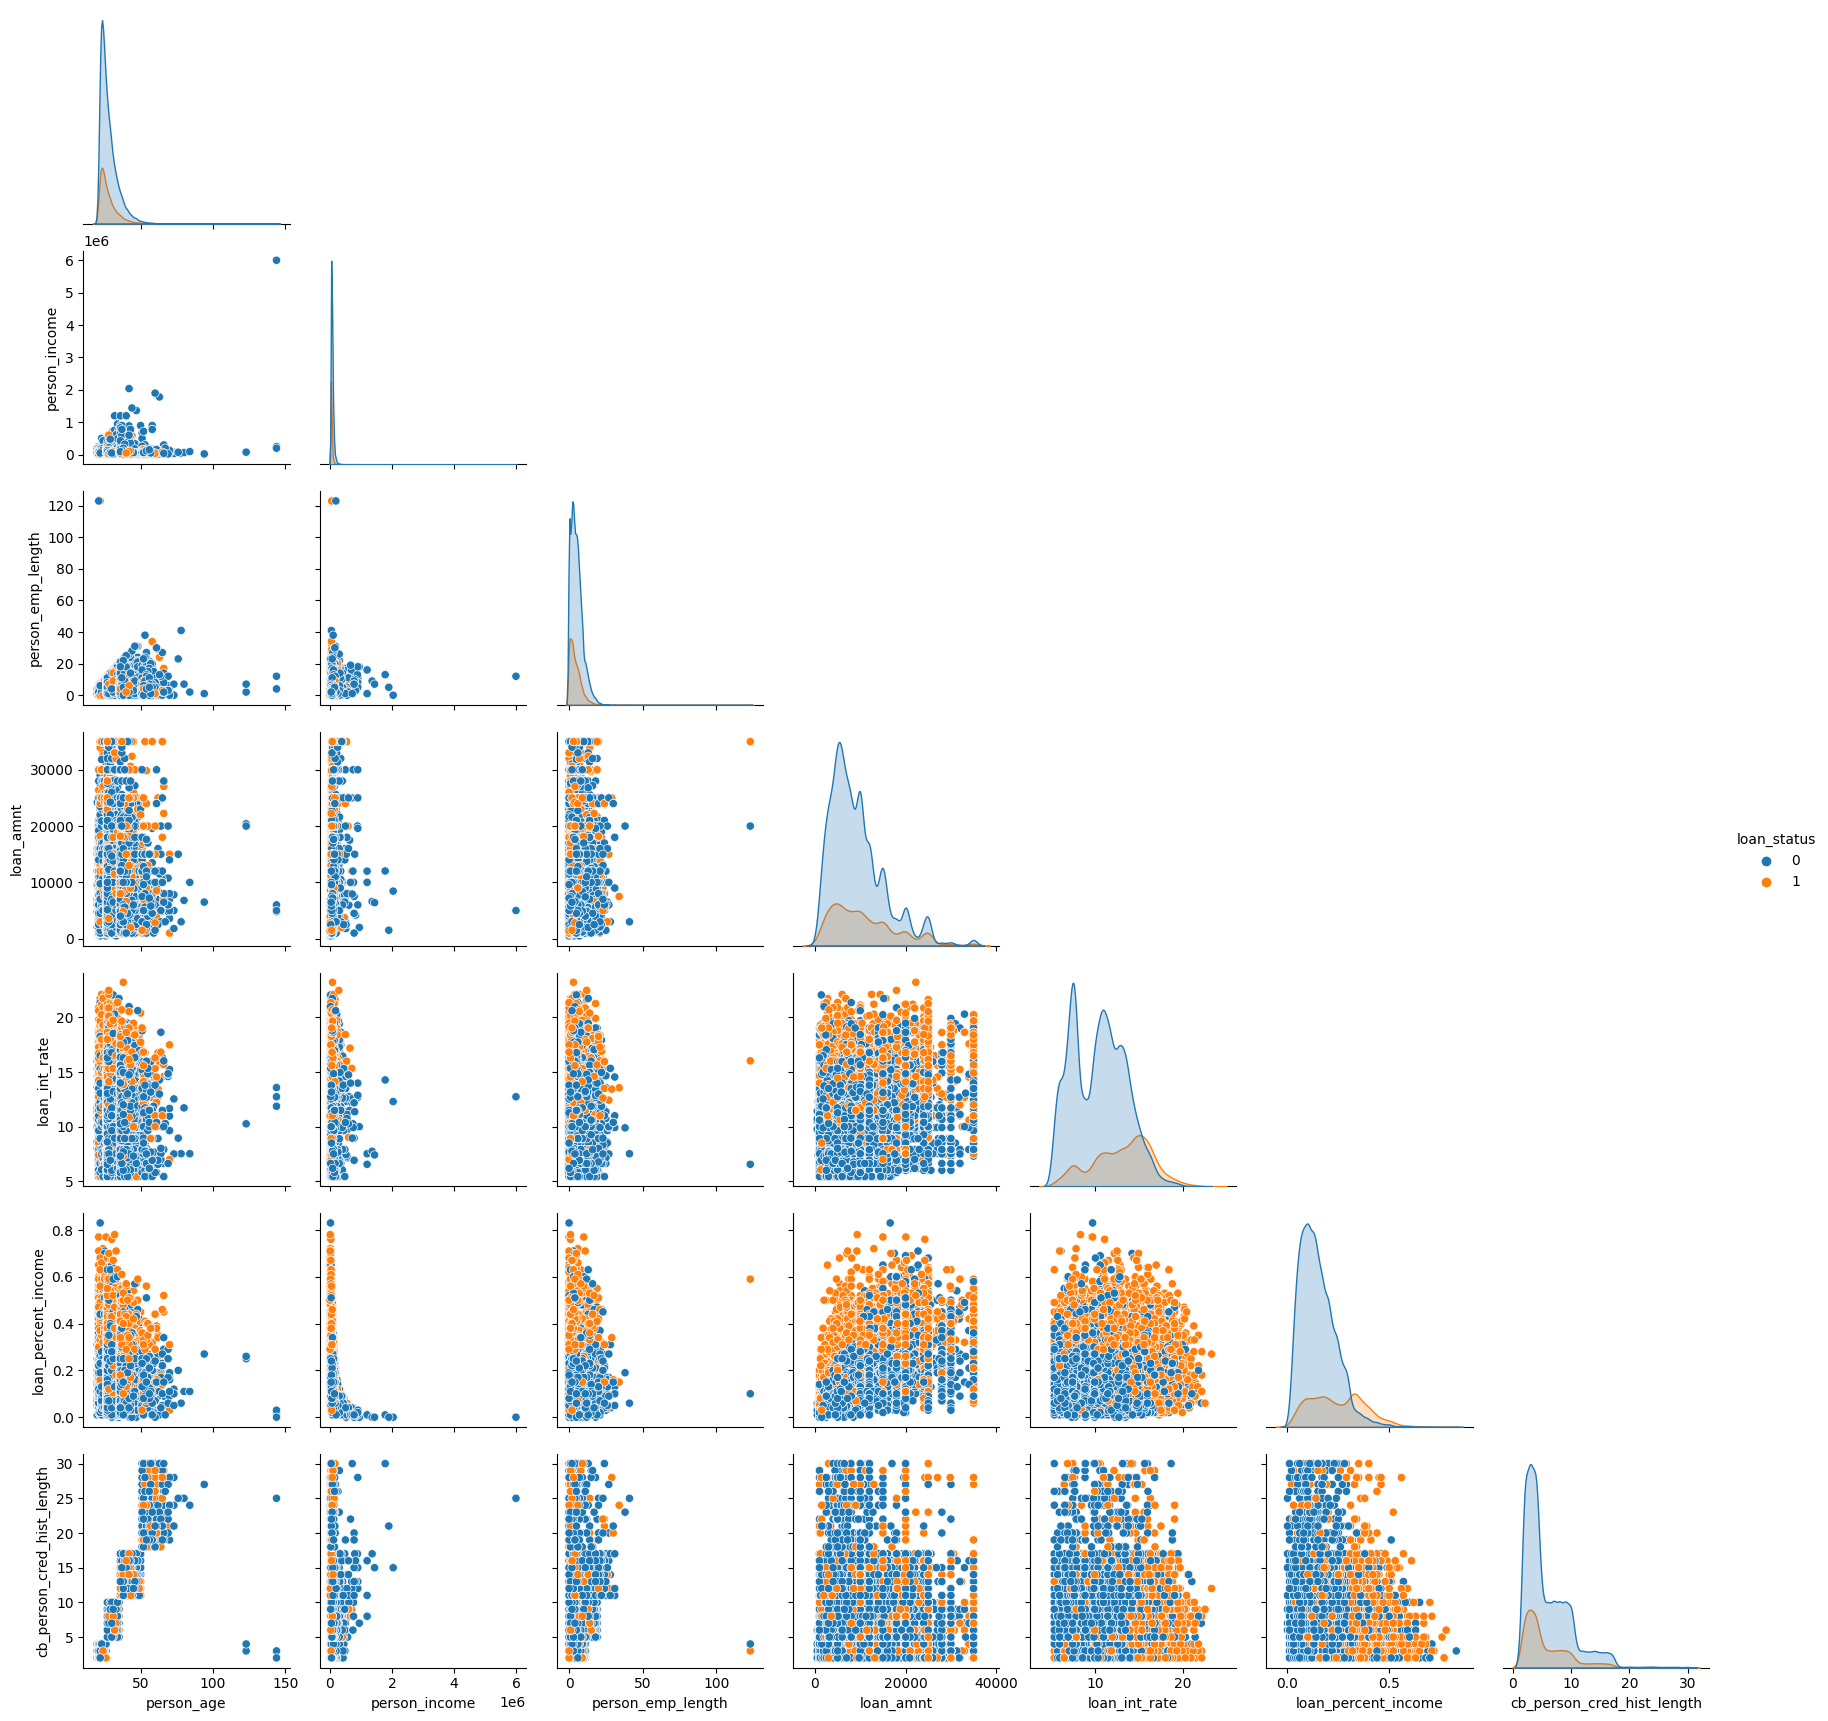

In [13]:
sns.pairplot(measures_df, hue = 'loan_status', corner = True)

<Axes: title={'center': 'person_age'}, xlabel='loan_status'>

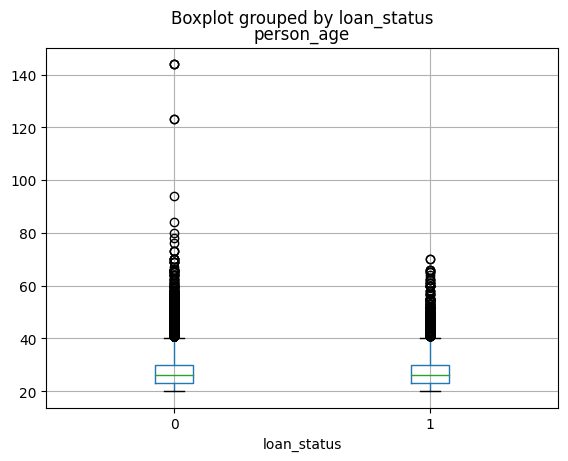

In [14]:
measures_df.boxplot(column=['person_age'],by='loan_status')

In [15]:
credit_base['person_home_ownership'].value_counts()

RENT        16446
MORTGAGE    13444
OWN          2584
OTHER         107
Name: person_home_ownership, dtype: int64

In [16]:
credit_base['loan_intent'].value_counts()

EDUCATION            6453
MEDICAL              6071
VENTURE              5719
PERSONAL             5521
DEBTCONSOLIDATION    5212
HOMEIMPROVEMENT      3605
Name: loan_intent, dtype: int64

In [17]:
credit_base['loan_grade'].value_counts()

A    10777
B    10451
C     6458
D     3626
E      964
F      241
G       64
Name: loan_grade, dtype: int64

In [18]:
credit_base['cb_person_default_on_file'].value_counts()

N    26836
Y     5745
Name: cb_person_default_on_file, dtype: int64

<Axes: xlabel='person_age', ylabel='cb_person_default_on_file'>

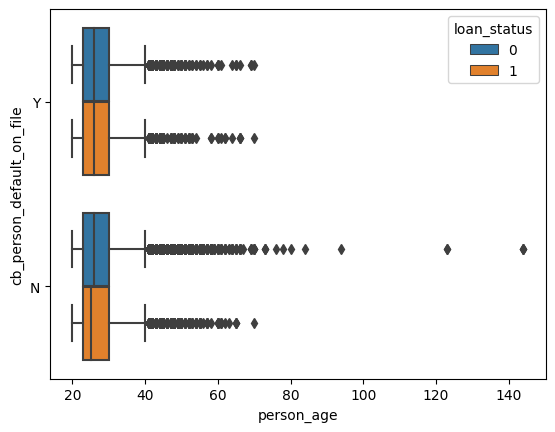

In [19]:
sns.boxplot(data=credit_base, x="person_age", y="cb_person_default_on_file", hue="loan_status")

#PREPROCESSING

##dropping null valued rows

In [20]:
credit_base.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [21]:
credit_base = credit_base.dropna()

In [22]:
credit_base.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,28638.000000,2.863800e+04,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000,28638.000000
mean,27.727216,6.664937e+04,4.788672,9656.493121,11.039867,0.216600,0.169488,5.793736
std,6.310441,6.235645e+04,4.154627,6329.683361,3.229372,0.411935,0.106393,4.038483
min,20.000000,4.000000e+03,0.000000,500.000000,5.420000,0.000000,0.000000,2.000000
25%,23.000000,3.948000e+04,2.000000,5000.000000,7.900000,0.000000,0.090000,3.000000
50%,26.000000,5.595600e+04,4.000000,8000.000000,10.990000,0.000000,0.150000,4.000000
75%,30.000000,8.000000e+04,7.000000,12500.000000,13.480000,0.000000,0.230000,8.000000
max,144.000000,6.000000e+06,123.000000,35000.000000,23.220000,1.000000,0.830000,30.000000


##outliers

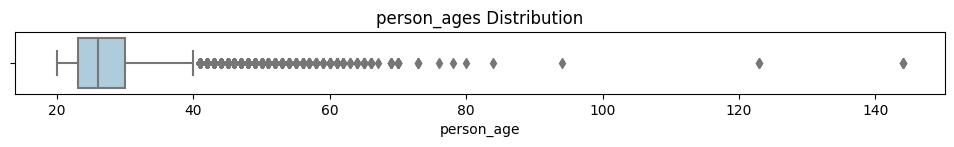

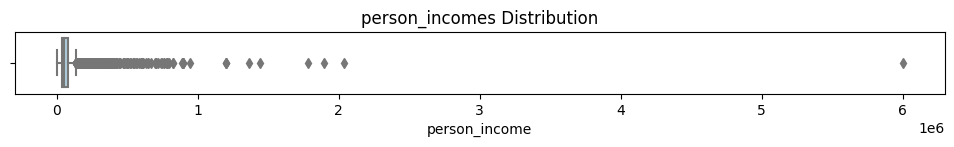

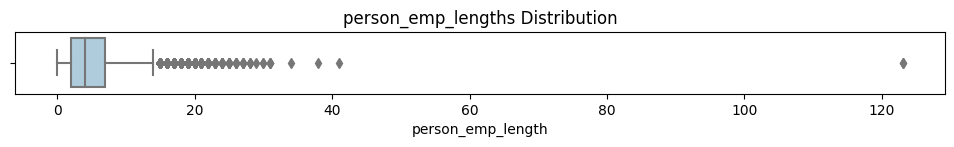

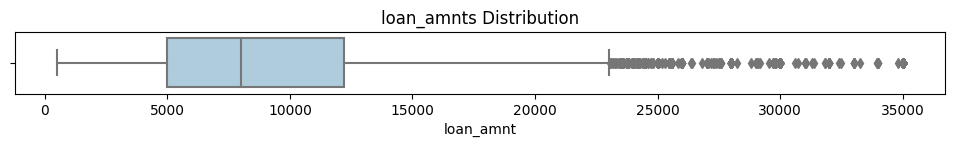

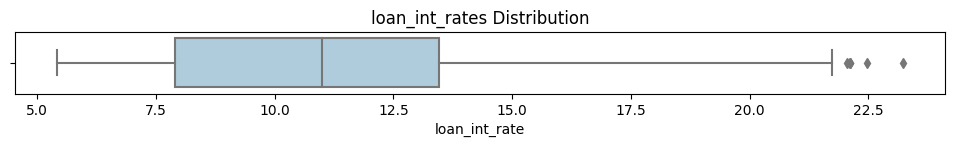

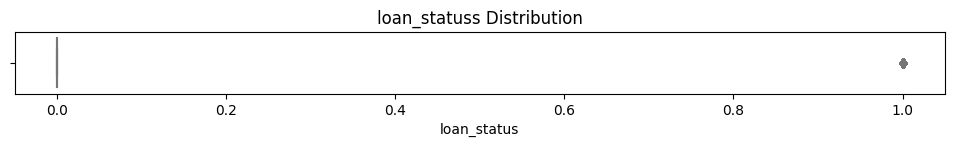

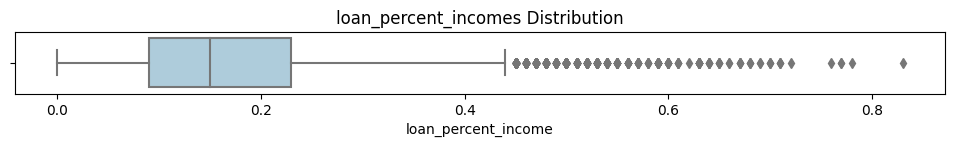

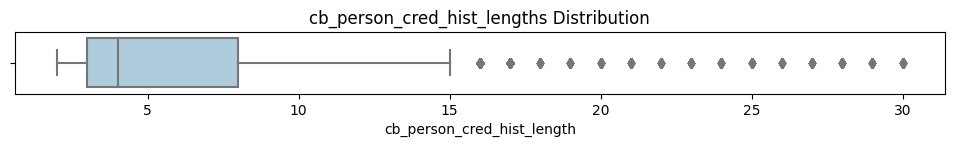

In [23]:
for column in measures_df:
        plt.figure(figsize=(12,0.8))
        sns.boxplot(data=measures_df, x=column,palette="Paired")
        plt.title(f'{column}''s Distribution')  

In [24]:
for i in measures_df.columns:
    print ('# of rows beyond range of 3 standard deviations in ', i)
    print(len(measures_df[(measures_df[i] > measures_df[i].mean() + 3*measures_df[i].std()) | (measures_df[i] < measures_df[i].mean() - 3*measures_df[i].std())]))

# of rows beyond range of 3 standard deviations in  person_age
558
# of rows beyond range of 3 standard deviations in  person_income
233
# of rows beyond range of 3 standard deviations in  person_emp_length
321
# of rows beyond range of 3 standard deviations in  loan_amnt
337
# of rows beyond range of 3 standard deviations in  loan_int_rate
38
# of rows beyond range of 3 standard deviations in  loan_status
0
# of rows beyond range of 3 standard deviations in  loan_percent_income
336
# of rows beyond range of 3 standard deviations in  cb_person_cred_hist_length
284


In [25]:
credit_base.shape

(28638, 12)

In [26]:
for col in columns:
  credit_base = credit_base[(credit_base[col] <= credit_base[col].mean() + 3*credit_base[col].std()) &
        (credit_base[col] >= credit_base[col].mean() - 3*credit_base[col].std())]

In [27]:
credit_base.shape

(26620, 12)

##encoding

In [28]:
credit_base.columns

Index(['person_age', 'person_income', 'person_home_ownership',
       'person_emp_length', 'loan_intent', 'loan_grade', 'loan_amnt',
       'loan_int_rate', 'loan_status', 'loan_percent_income',
       'cb_person_default_on_file', 'cb_person_cred_hist_length'],
      dtype='object')

In [29]:
credit_base['cb_person_default_on_file'] = credit_base['cb_person_default_on_file'].astype('category')
credit_base['loan_grade'] = credit_base['loan_grade'].astype('category')
credit_base['loan_intent'] = credit_base['loan_intent'].astype('category')
credit_base['person_home_ownership'] = credit_base['person_home_ownership'].astype('category')

In [30]:
credit_base['cb_person_default_on_file_new'] = credit_base['cb_person_default_on_file'].cat.codes
credit_base['loan_grade_new'] = credit_base['loan_grade'].cat.codes
credit_base['loan_intent_new'] = credit_base['loan_intent'].cat.codes
credit_base['person_home_ownership_new'] = credit_base['person_home_ownership'].cat.codes

In [31]:
credit_base['loan_intent_new'].head()

1     1
5     5
9     5
11    2
19    1
Name: loan_intent_new, dtype: int8

In [32]:
from sklearn.preprocessing import OneHotEncoder

enc=OneHotEncoder()
enc_data=pd.DataFrame(enc.fit_transform(credit_base[['cb_person_default_on_file_new','loan_grade_new', 'loan_intent_new', 'person_home_ownership_new']]).toarray(), index=np.array(credit_base.index))

In [33]:
np.array(credit_base.index)

array([    1,     5,     9, ..., 32293, 32295, 32296])

In [34]:
enc_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [35]:
New_df=credit_base.join(enc_data)

In [36]:
New_df.columns

Index([                   'person_age',                 'person_income',
               'person_home_ownership',             'person_emp_length',
                         'loan_intent',                    'loan_grade',
                           'loan_amnt',                 'loan_int_rate',
                         'loan_status',           'loan_percent_income',
           'cb_person_default_on_file',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,            

In [37]:
New_df = New_df.drop(columns=['cb_person_default_on_file', 'loan_grade', 'loan_intent', 'person_home_ownership'])

In [38]:
New_df.columns

Index([                   'person_age',                 'person_income',
                   'person_emp_length',                     'loan_amnt',
                       'loan_int_rate',                   'loan_status',
                 'loan_percent_income',    'cb_person_cred_hist_length',
       'cb_person_default_on_file_new',                'loan_grade_new',
                     'loan_intent_new',     'person_home_ownership_new',
                                     0,                               1,
                                     2,                               3,
                                     4,                               5,
                                     6,                               7,
                                     8,                               9,
                                    10,                              11,
                                    12,                              13,
                                    14,            

In [39]:
New_df.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length,cb_person_default_on_file_new,loan_grade_new,...,9,10,11,12,13,14,15,16,17,18
1,21,9600,5.0,1000,11.14,0,0.10,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5,21,9900,2.0,2500,7.14,1,0.25,2,0,0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,21,10000,6.0,1600,14.74,1,0.16,3,0,3,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
11,21,10000,2.0,4500,8.63,1,0.45,2,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19,24,10800,8.0,1750,10.99,1,0.16,2,0,1,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


# stripping target values

In [40]:
features = New_df.drop('loan_status', 1)
target = New_df['loan_status']

In [41]:
features.shape

(26620, 30)

In [42]:
target.head()

1     0
5     1
9     1
11    1
19    1
Name: loan_status, dtype: int64

In [43]:
del New_df

# train test split

In [44]:
x_train, x_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=0)

# standarising data

In [45]:
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train.values)
x_test = scaler.transform(x_test.values)

# feature extraction

In [46]:
Estimator = RandomForestClassifier(n_estimators=10) 
#using random forest as the estimator for recursive feature extractor
FeatureExtractor = RFE(estimator=Estimator, n_features_to_select=20)
fitter = FeatureExtractor.fit(x_train, y_train)
extracted_features = features.columns[(fitter.get_support())]

In [47]:
extracted_features

Index([                   'person_age',                 'person_income',
                   'person_emp_length',                     'loan_amnt',
                       'loan_int_rate',           'loan_percent_income',
          'cb_person_cred_hist_length', 'cb_person_default_on_file_new',
                      'loan_grade_new',               'loan_intent_new',
           'person_home_ownership_new',                               4,
                                     5,                               9,
                                    10,                              11,
                                    12,                              15,
                                    17,                              18],
      dtype='object')

In [48]:
fitter.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True, False, False, False, False,  True,  True, False,
       False, False,  True,  True,  True,  True, False, False,  True,
       False,  True,  True])

In [49]:
featureSelectedTrain = [row[fitter.get_support()] for row in x_train]
featureSelectedTest = [row[fitter.get_support()] for row in x_test]

# class imbalance

In [50]:
credit_base['loan_status'].value_counts()

0    21039
1     5581
Name: loan_status, dtype: int64

# upsampling

In [51]:
upsampler = SMOTE(random_state = 5)
x_train_ures_SMOTE, y_train_ures_SMOTE = upsampler.fit_resample(x_train, y_train.ravel())

In [52]:
print('Before OverSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before OverSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After OverSampling, the shape of train_X: {}'.format(x_train_ures_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_ures_SMOTE.shape))

print("Counts of label '0' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 0),sum(y_train_ures_SMOTE == 0)))
print("Counts of label '1' - Before Oversampling:{}, After OverSampling: {}".format(sum(y_train == 1),sum(y_train_ures_SMOTE == 1)))

Before OverSampling, the shape of train_X: (21296, 30)
Before OverSampling, the shape of train_y: (21296,) 

After OverSampling, the shape of train_X: (33616, 30)
After OverSampling, the shape of train_y: (33616,) 

Counts of label '0' - Before Oversampling:16808, After OverSampling: 16808
Counts of label '1' - Before Oversampling:4488, After OverSampling: 16808


# downsampling

In [53]:
downsampler = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
x_train_dres, y_train_dres = downsampler.fit_resample(x_train, y_train)

In [54]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))

Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (17413, 30)
After UnderSampling, the shape of train_y: (17413,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 12925
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


In [55]:
x_train_dres, y_train_dres = downsampler.fit_resample(x_train_dres, y_train_dres)

In [56]:
print('Before UnderSampling, the shape of train_X: {}'.format(x_train.shape))
print('Before UnderSampling, the shape of train_y: {} \n'.format(y_train.shape))

print('After UnderSampling, the shape of train_X: {}'.format(x_train_dres.shape))
print('After UnderSampling, the shape of train_y: {} \n'.format(y_train_dres.shape))

print("Counts of label '0' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 0),sum(y_train_dres == 0)))
print("Counts of label '1' - Before UnderSampling:{}, After UnderSampling: {}".format(sum(y_train == 1),sum(y_train_dres == 1)))


Before UnderSampling, the shape of train_X: (21296, 30)
Before UnderSampling, the shape of train_y: (21296,) 

After UnderSampling, the shape of train_X: (14791, 30)
After UnderSampling, the shape of train_y: (14791,) 

Counts of label '0' - Before UnderSampling:16808, After UnderSampling: 10303
Counts of label '1' - Before UnderSampling:4488, After UnderSampling: 4488


#PCA

#no resampling

In [57]:
PCanalysis = PCA()
x_train_pca = PCanalysis.fit_transform(x_train)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16462406 0.26836134 0.34306381 0.41053816 0.47319864 0.52278867
 0.56543052 0.60662328 0.64751193 0.68777819 0.72613252 0.76313788
 0.79892112 0.83280874 0.86645296 0.90002942 0.93300633 0.96153991
 0.98969758 0.99483158 0.99769644 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [58]:
PCanalysis = PCA(19)
X_train_pca = PCanalysis.fit_transform(x_train)
X_test_transformed_pca = PCanalysis.transform(x_test)

In [59]:
X_train_pca.shape

(21296, 19)

In [60]:
PCanalysis = PCA()
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.17064    0.26371695 0.33450876 0.39935496 0.46100754 0.51648392
 0.56924548 0.62118359 0.67060887 0.71142932 0.74964969 0.78569214
 0.81983226 0.85378188 0.88736093 0.91718359 0.94534726 0.96960543
 0.99153197 0.99554266 0.99814181 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [61]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.17064    0.26371695 0.33450876 0.39935496 0.46100754 0.51648392
 0.56924548 0.62118359 0.67060887 0.71142932 0.74964969 0.78569214
 0.81983226 0.85378188 0.88736093 0.91718359 0.94534726 0.96960543
 0.99153197]


In [62]:
PCanalysis = PCA(18)
X_train_upsampled_pca = PCanalysis.fit_transform(x_train_ures_SMOTE)
X_test_upsampled_transformed_pca = PCanalysis.transform(x_test)

In [63]:
X_train_upsampled_pca.shape

(33616, 18)

In [64]:
X_train_upsampled_pca[:,0].shape

(33616,)

[Text(0.5, 1.0, ' data PCA projection')]

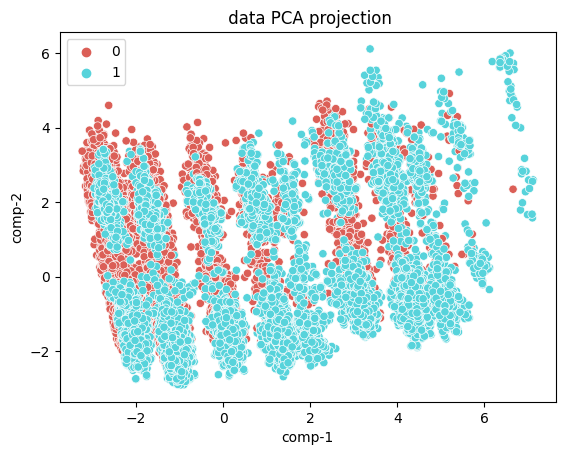

In [65]:
df1 = pd.DataFrame()
df1["y"] = y_train_ures_SMOTE
df1["comp-1"] = X_train_upsampled_pca[:,0]
df1["comp-2"] = X_train_upsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df1.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df1).set(title=" data PCA projection") 

#downsample

In [66]:
PCanalysis = PCA()
x_train_downlsampled_pca = PCanalysis.fit_transform(x_train_dres)
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597 0.9942807  0.99761155 1.         1.         1.
 1.         1.         1.         1.         1.         1.        ]


In [67]:
print("Variance Ratio: " ,np.cumsum(PCanalysis.explained_variance_ratio_[:19]))

Variance Ratio:  [0.16556667 0.26633271 0.34416746 0.41148759 0.47422642 0.52539041
 0.5708905  0.61547237 0.6573917  0.69872595 0.73716549 0.77403486
 0.81002263 0.8455647  0.87971811 0.91263    0.94122848 0.96579978
 0.98906597]


In [68]:
PCanalysis = PCA(n_components=18)
x_train_downsampled_pca = PCanalysis.fit_transform(x_train_dres)
x_test_downsampled_transformed_pca = PCanalysis.transform(x_test)


In [69]:
x_train_downsampled_pca.shape

(14791, 18)

[Text(0.5, 1.0, ' data PCA projection')]

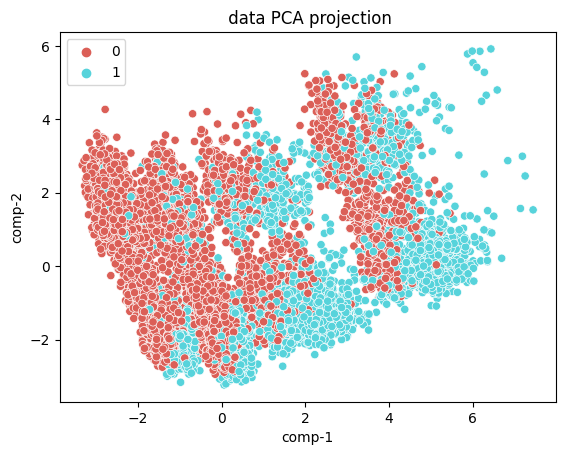

In [70]:
df = pd.DataFrame()
df["y"] = y_train_dres
df["comp-1"] = x_train_downsampled_pca[:,0]
df["comp-2"] = x_train_downsampled_pca[:,1]

sns.scatterplot(x="comp-1", y="comp-2", hue=df.y.tolist(),
                palette=sns.color_palette("hls", 2),
                data=df).set(title=" data PCA projection") 

#Models

In [71]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import accuracy_score

In [72]:
def scores(y_test, y_prediction):
  print('Analysis of the Algorithm:\n')
  print(confusion_matrix(y_test, y_prediction))
  print(confusion_matrix(y_test, y_prediction))
  print(classification_report(y_test, y_prediction))
  print('Accuracy:',accuracy_score(y_test, y_prediction))
  print('Precision:',precision_score(y_test, y_prediction, average='weighted'))
  print('Recall:',recall_score(y_test, y_prediction, average='weighted'))
  print('F1 Score:',f1_score(y_test, y_prediction, average='weighted'))

In [73]:
def roc(y_test, y_prediction):
  falsePositiveRate = dict()
  truePositiveRate = dict()
  threshold = dict()

  for i in range(6):    
      falsePositiveRate[i], truePositiveRate[i], threshold[i] = roc_curve(y_test, y_prediction, pos_label=i)

  plt.plot(falsePositiveRate[0], truePositiveRate[0], linestyle='--',color='blue', label='Class 0 vs Rest')
  plt.plot(falsePositiveRate[1], truePositiveRate[1], linestyle='--',color='yellow', label='Class 1 vs Rest')

  plt.title('Multiclass ROC curve for LR')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')
  plt.savefig('Multiclass ROC curve for LR ',dpi=300)

In [74]:
# summarize results
def results(grid_result):
  print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
  means = grid_result.cv_results_['mean_test_score']
  stds = grid_result.cv_results_['std_test_score']
  params = grid_result.cv_results_['params']
  for mean, stdev, param in zip(means, stds, params):
      print("%f (%f) with: %r" % (mean, stdev, param))

In [75]:
resultDic={}

#LR Model with GridsearchCV

In [76]:
def LR(x_train, y_train):
  model = LogisticRegression()
  solver=['saga']
  penalty = ['l2', 'l1']
  c_values = [100, 10, 1.0, 0.1, 0.01]
  
  # define grid search
  grid = dict(solver=solver,penalty=penalty,C=c_values)
  cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=1)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring=make_scorer(recall_score, average='weighted'), error_score=0)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [77]:
LRresult={}

##Logistic Regression without resampling

In [78]:
grid_result = LR(x_train, y_train)

In [79]:
results(grid_result)

Best: 0.868426 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.867957 (0.001690) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002488) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [80]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR1'])

Analysis of the Algorithm:

[[4015  216]
 [ 495  598]]
[[4015  216]
 [ 495  598]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.55      0.63      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8664537941397445
Precision: 0.8582996906809005
Recall: 0.8664537941397445
F1 Score: 0.8588159828706913
testing recall Score for class1: 0.5471180237877402


In [81]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5479055258467023


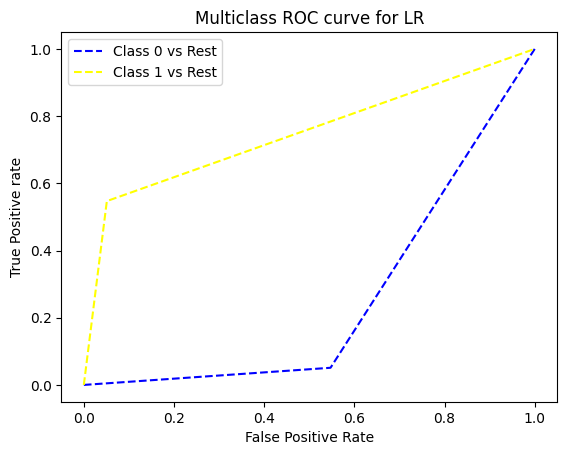

In [82]:
roc(y_test, y_prediction)

##Logistic Regression without resampling and pca

In [83]:
grid_result = LR(x_train_pca, y_train)

In [84]:
results(grid_result)

Best: 0.868426 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001422) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868426 (0.001498) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868379 (0.001521) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868191 (0.001611) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868426 (0.001758) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.866876 (0.001351) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.865562 (0.001774) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [85]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", LRresult['LR2'])

Analysis of the Algorithm:

[[3707  524]
 [ 789  304]]
[[3707  524]
 [ 789  304]]
              precision    recall  f1-score   support

           0       0.82      0.88      0.85      4231
           1       0.37      0.28      0.32      1093

    accuracy                           0.75      5324
   macro avg       0.60      0.58      0.58      5324
weighted avg       0.73      0.75      0.74      5324

Accuracy: 0.7533809166040571
Precision: 0.7306159573269803
Recall: 0.7533809166040571
F1 Score: 0.7401148503638109
Class 1 recall score on test data: 0.27813357731015553


In [86]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5452317290552585


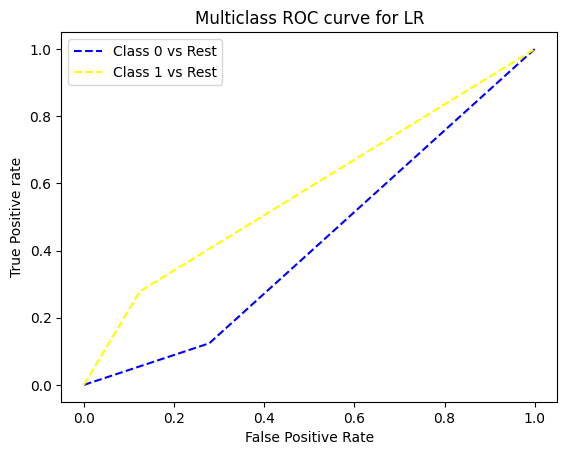

In [87]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling

In [88]:
grid_result = LR(x_train_dres, y_train_dres)

In [89]:
results(grid_result)

Best: 0.880941 using {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.880739 (0.002672) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.880671 (0.002720) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880536 (0.002674) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.880468 (0.003108) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.880941 (0.003113) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880671 (0.003576) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.878981 (0.003391) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [90]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',LRresult['LR3'])

Analysis of the Algorithm:

[[3603  628]
 [ 293  800]]
[[3603  628]
 [ 293  800]]
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      4231
           1       0.56      0.73      0.63      1093

    accuracy                           0.83      5324
   macro avg       0.74      0.79      0.76      5324
weighted avg       0.85      0.83      0.83      5324

Accuracy: 0.8270097670924117
Precision: 0.8499495006519464
Recall: 0.8270097670924117
F1 Score: 0.8349381822430395
testing recall Score: 0.7319304666056725


In [91]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7355169340463458


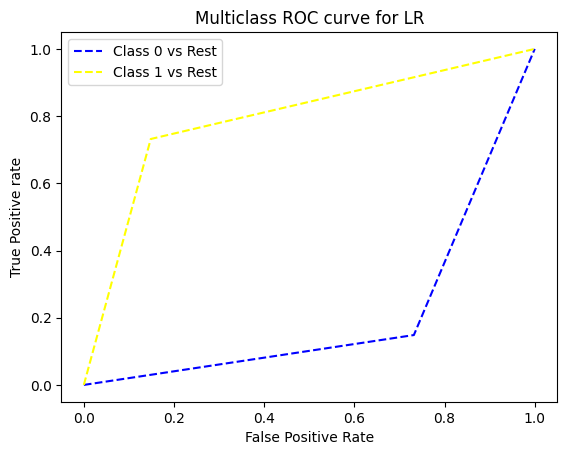

In [92]:
roc(y_test, y_prediction)

##Logistic Regression with undersampling and pca

In [93]:
grid_result = LR(x_train_downsampled_pca, y_train_dres)

In [94]:
results(grid_result)

Best: 0.880198 using {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003403) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.880062 (0.003474) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.880062 (0.003474) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.880198 (0.003475) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.880130 (0.003395) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.879860 (0.003320) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.879724 (0.002797) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.880062 (0.002598) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.875262 (0.003002) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [95]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',LRresult['LR4'])

Analysis of the Algorithm:

[[3587  644]
 [ 285  808]]
[[3587  644]
 [ 285  808]]
              precision    recall  f1-score   support

           0       0.93      0.85      0.89      4231
           1       0.56      0.74      0.63      1093

    accuracy                           0.83      5324
   macro avg       0.74      0.79      0.76      5324
weighted avg       0.85      0.83      0.83      5324

Accuracy: 0.8255071374906086
Precision: 0.8504510831713763
Recall: 0.8255071374906086
F1 Score: 0.8339487815640269
testing class 1 recall Score: 0.7392497712717292


In [96]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7375222816399287


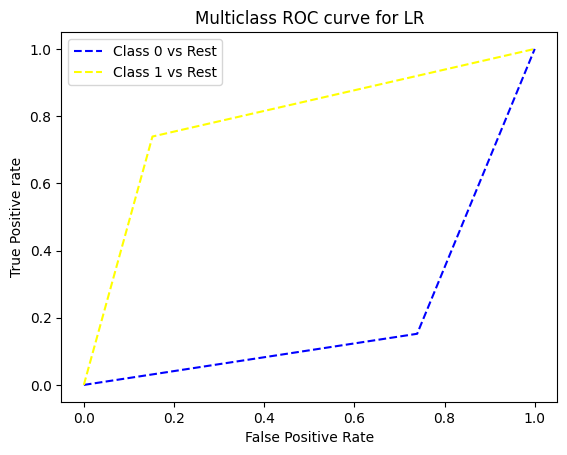

In [97]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling

In [98]:
grid_result = LR(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [99]:
results(grid_result)

Best: 0.803546 using {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802445 (0.002455) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.802445 (0.002455) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002465) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.802475 (0.002497) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.802475 (0.002418) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.802534 (0.002503) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.802415 (0.002411) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.802743 (0.002429) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.803546 (0.002678) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.802713 (0.002042) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [100]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
LRresult['LR5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR5'])

Analysis of the Algorithm:

[[3441  790]
 [ 256  837]]
[[3441  790]
 [ 256  837]]
              precision    recall  f1-score   support

           0       0.93      0.81      0.87      4231
           1       0.51      0.77      0.62      1093

    accuracy                           0.80      5324
   macro avg       0.72      0.79      0.74      5324
weighted avg       0.85      0.80      0.82      5324

Accuracy: 0.8035311795642374
Precision: 0.845287382224053
Recall: 0.8035311795642374
F1 Score: 0.8162002085314433
Class 1 recall score for test data: 0.7657822506861848


In [101]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7852213231794384


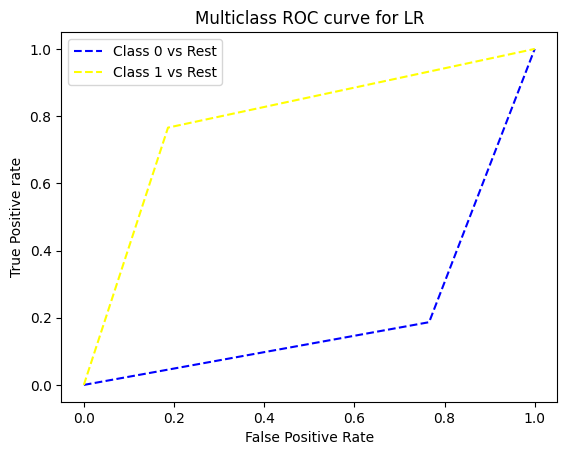

In [102]:
roc(y_test, y_prediction)

##Logistic Regression with upsampling and pca

In [103]:
grid_result = LR(X_train_upsampled_pca, y_train_ures_SMOTE)

In [104]:
results(grid_result)

Best: 0.788702 using {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}
0.787869 (0.004093) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.787899 (0.004092) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.787928 (0.004091) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.787928 (0.004138) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.787809 (0.004157) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.787988 (0.004184) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.788047 (0.003956) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.788702 (0.004333) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [105]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
LRresult['LR6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", LRresult['LR6'])

Analysis of the Algorithm:

[[3363  868]
 [ 253  840]]
[[3363  868]
 [ 253  840]]
              precision    recall  f1-score   support

           0       0.93      0.79      0.86      4231
           1       0.49      0.77      0.60      1093

    accuracy                           0.79      5324
   macro avg       0.71      0.78      0.73      5324
weighted avg       0.84      0.79      0.80      5324

Accuracy: 0.7894440270473329
Precision: 0.840066001671411
Recall: 0.7894440270473329
F1 Score: 0.8043082828519552
Class 1 recall score for test data: 0.7685269899359561


In [106]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7793907663017611


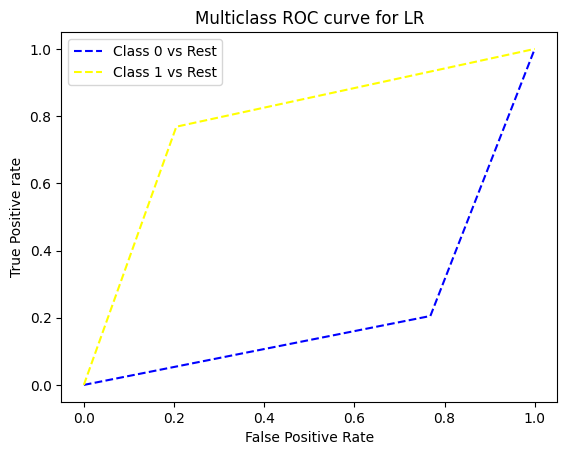

In [107]:
roc(y_test, y_prediction)

##Logistic Regression with select features

In [108]:
grid_result = LR(featureSelectedTrain, y_train)

In [109]:
results(grid_result)

Best: 0.868473 using {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 100, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 100, 'penalty': 'l1', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 10, 'penalty': 'l2', 'solver': 'saga'}
0.868473 (0.001514) with: {'C': 10, 'penalty': 'l1', 'solver': 'saga'}
0.868332 (0.001533) with: {'C': 1.0, 'penalty': 'l2', 'solver': 'saga'}
0.868191 (0.001930) with: {'C': 1.0, 'penalty': 'l1', 'solver': 'saga'}
0.868097 (0.001671) with: {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}
0.868238 (0.001362) with: {'C': 0.1, 'penalty': 'l1', 'solver': 'saga'}
0.865796 (0.002159) with: {'C': 0.01, 'penalty': 'l2', 'solver': 'saga'}
0.864810 (0.002111) with: {'C': 0.01, 'penalty': 'l1', 'solver': 'saga'}


In [110]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
LRresult['LR7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',LRresult['LR7'])

Analysis of the Algorithm:

[[4016  215]
 [ 500  593]]
[[4016  215]
 [ 500  593]]
              precision    recall  f1-score   support

           0       0.89      0.95      0.92      4231
           1       0.73      0.54      0.62      1093

    accuracy                           0.87      5324
   macro avg       0.81      0.75      0.77      5324
weighted avg       0.86      0.87      0.86      5324

Accuracy: 0.8657024793388429
Precision: 0.8573852511167052
Recall: 0.8657024793388429
F1 Score: 0.8578233448999882
testing recall Score for class1: 0.5425434583714547


In [111]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.5499108734402852


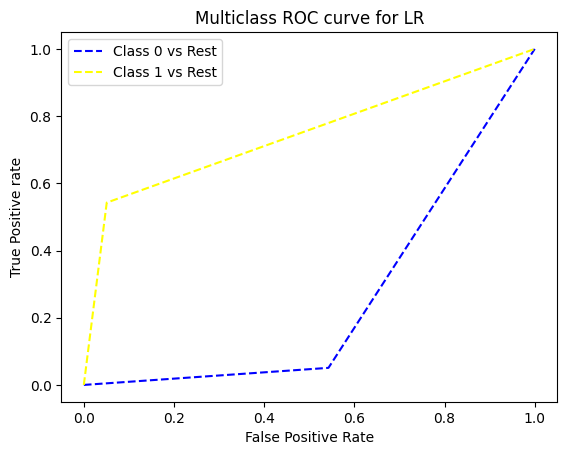

In [112]:
roc(y_test, y_prediction)

##Logistic Regression comparision

In [113]:
LRresult

{'LR1': 0.5471180237877402,
 'LR2': 0.27813357731015553,
 'LR3': 0.7319304666056725,
 'LR4': 0.7392497712717292,
 'LR5': 0.7657822506861848,
 'LR6': 0.7685269899359561,
 'LR7': 0.5425434583714547}

Logistic Regression with neighborhood cleaning rule undersampling and PCA gave better Recall score for Class 1 

In [114]:
resultDic['LogisticRegression']=0.7685269899359561#LR6

#Decision Tree with gridsearchCV

In [115]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="entropy")
  max_depth = [3, 4, 5, 6, 7, 8, 9]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [116]:
DTresult={}

##Decision Tree without resampling

In [117]:
grid_result = DT(x_train, y_train)

In [118]:
results(grid_result)

Best: 0.927451 using {'max_depth': 9, 'min_samples_split': 10}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 4}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 10}
0.888007 (0.007130) with: {'max_depth': 3, 'min_samples_split': 20}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 4}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 10}
0.906978 (0.005703) with: {'max_depth': 4, 'min_samples_split': 20}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 4}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 10}
0.921347 (0.004701) with: {'max_depth': 5, 'min_samples_split': 20}
0.923929 (0.005480) with: {'max_depth': 6, 'min_samples_split': 4}
0.923929 (0.005480) with: {'max_depth': 6, 'min_samples_split': 10}
0.923788 (0.005602) with: {'max_depth': 6, 'min_samples_split': 20}
0.924774 (0.004509) with: {'max_depth': 7, 'min_samples_split': 4}
0.924774 (0.004577) with: {'max_depth': 7, 'min_samples_sp

In [119]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT1'])

Analysis of the Algorithm:

[[4203   28]
 [ 327  766]]
[[4203   28]
 [ 327  766]]
              precision    recall  f1-score   support

           0       0.93      0.99      0.96      4231
           1       0.96      0.70      0.81      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.93      0.93      5324

Accuracy: 0.933320811419985
Precision: 0.9353943206431395
Recall: 0.933320811419985
F1 Score: 0.9291758981633123
testing recall Score for class1: 0.7008234217749314


In [120]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.7043226381461676


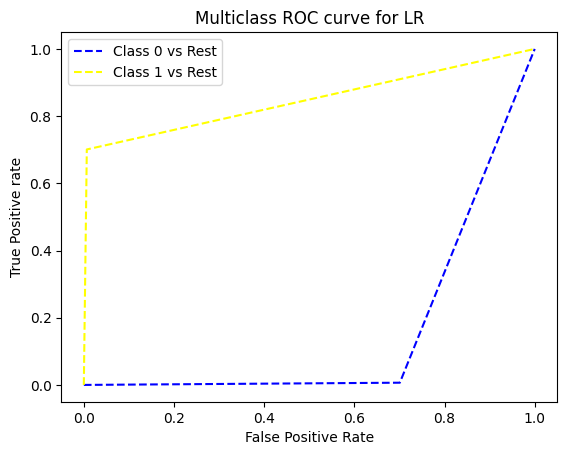

In [121]:
roc(y_test, y_prediction)

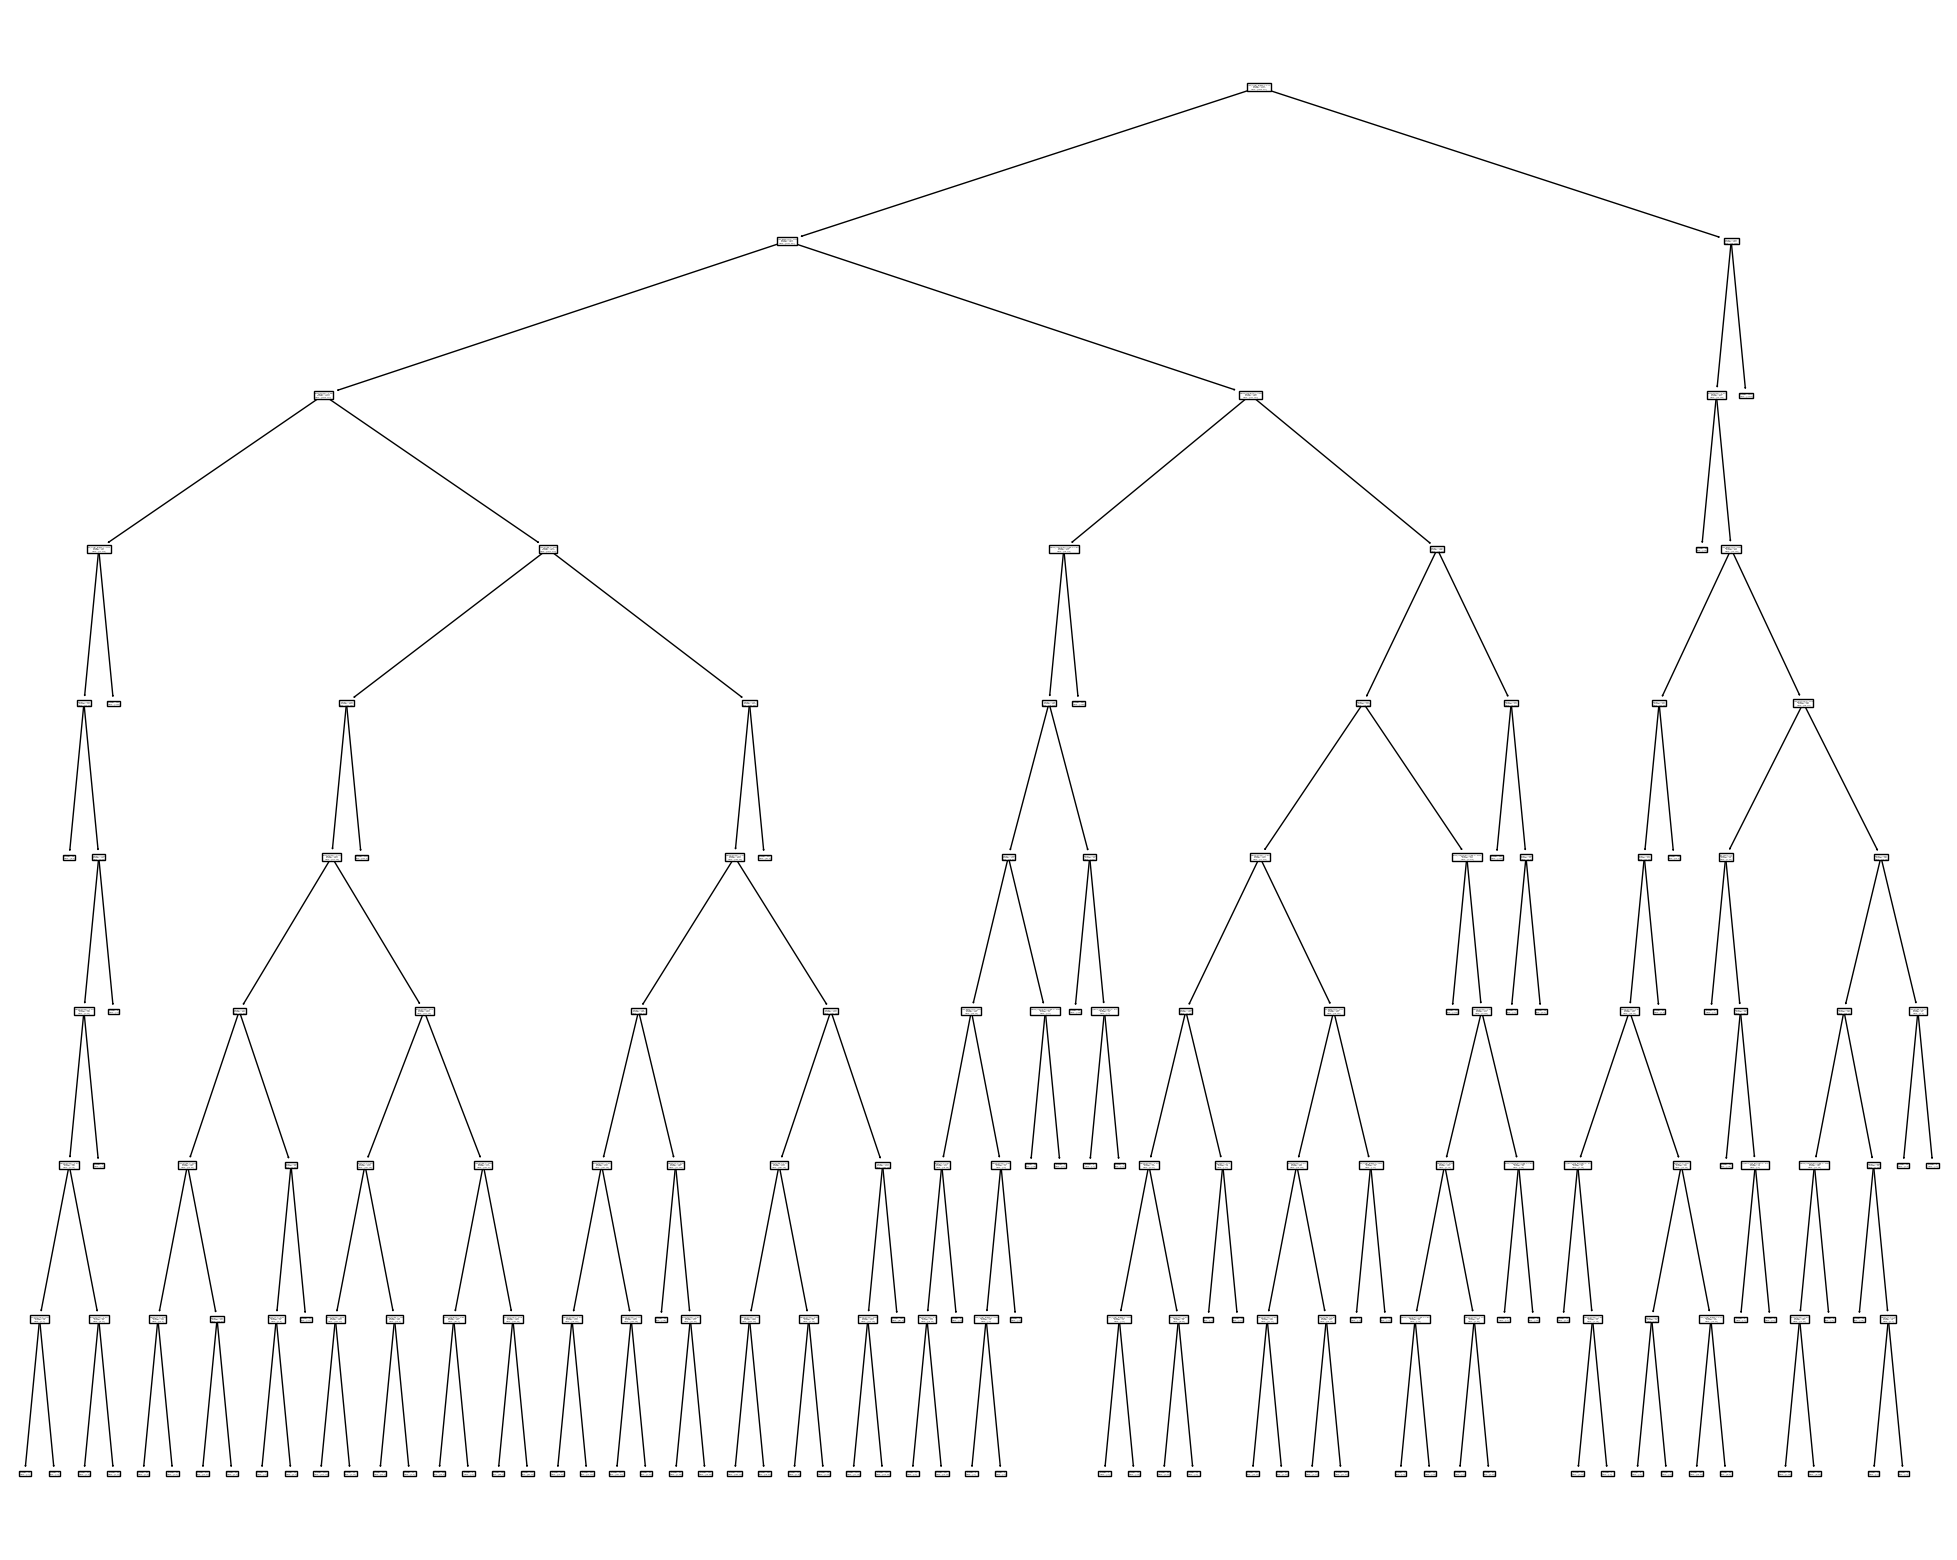

In [122]:
fig = plt.figure(figsize=(25,20))
from sklearn.tree import plot_tree
fig = plot_tree(grid_result.best_estimator_, feature_names=features.keys())

##Decision Tree without resampling and pca

In [123]:
grid_result = DT(x_train_pca, y_train)

In [124]:
results(grid_result)

Best: 0.894487 using {'max_depth': 9, 'min_samples_split': 4}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 4}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 10}
0.841520 (0.004123) with: {'max_depth': 3, 'min_samples_split': 20}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 4}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 10}
0.867346 (0.004458) with: {'max_depth': 4, 'min_samples_split': 20}
0.876221 (0.005837) with: {'max_depth': 5, 'min_samples_split': 4}
0.876127 (0.005920) with: {'max_depth': 5, 'min_samples_split': 10}
0.876127 (0.005920) with: {'max_depth': 5, 'min_samples_split': 20}
0.885143 (0.007668) with: {'max_depth': 6, 'min_samples_split': 4}
0.885236 (0.007368) with: {'max_depth': 6, 'min_samples_split': 10}
0.885330 (0.007312) with: {'max_depth': 6, 'min_samples_split': 20}
0.887866 (0.005688) with: {'max_depth': 7, 'min_samples_split': 4}
0.888148 (0.005855) with: {'max_depth': 7, 'min_samples_spl

In [125]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", DTresult['DT2'])

Analysis of the Algorithm:

[[3794  437]
 [ 898  195]]
[[3794  437]
 [ 898  195]]
              precision    recall  f1-score   support

           0       0.81      0.90      0.85      4231
           1       0.31      0.18      0.23      1093

    accuracy                           0.75      5324
   macro avg       0.56      0.54      0.54      5324
weighted avg       0.71      0.75      0.72      5324

Accuracy: 0.7492486851990984
Precision: 0.7059484465319732
Recall: 0.7492486851990984
F1 Score: 0.7222199328825836
Class 1 recall score on test data: 0.17840805123513268


In [126]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.6492869875222816


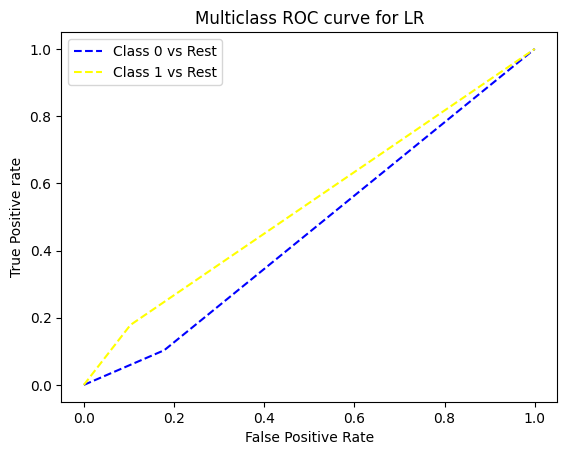

In [127]:
roc(y_test, y_prediction)

##Decision Tree with undersampling

In [128]:
grid_result = DT(x_train_dres, y_train_dres)

In [129]:
results(grid_result)

Best: 0.915624 using {'max_depth': 9, 'min_samples_split': 4}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 4}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 10}
0.881684 (0.007971) with: {'max_depth': 3, 'min_samples_split': 20}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 4}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 10}
0.895409 (0.008386) with: {'max_depth': 4, 'min_samples_split': 20}
0.901494 (0.004802) with: {'max_depth': 5, 'min_samples_split': 4}
0.901494 (0.004802) with: {'max_depth': 5, 'min_samples_split': 10}
0.901359 (0.004969) with: {'max_depth': 5, 'min_samples_split': 20}
0.905483 (0.005001) with: {'max_depth': 6, 'min_samples_split': 4}
0.905483 (0.005001) with: {'max_depth': 6, 'min_samples_split': 10}
0.905280 (0.005041) with: {'max_depth': 6, 'min_samples_split': 20}
0.912379 (0.005378) with: {'max_depth': 7, 'min_samples_split': 4}
0.912446 (0.005469) with: {'max_depth': 7, 'min_samples_spl

In [130]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',DTresult['DT3'])

Analysis of the Algorithm:

[[3934  297]
 [ 274  819]]
[[3934  297]
 [ 274  819]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4231
           1       0.73      0.75      0.74      1093

    accuracy                           0.89      5324
   macro avg       0.83      0.84      0.84      5324
weighted avg       0.89      0.89      0.89      5324

Accuracy: 0.8927498121712998
Precision: 0.8936182088970307
Recall: 0.8927498121712998
F1 Score: 0.8931620019761624
testing recall Score: 0.7493138151875571


In [131]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7729500891265597


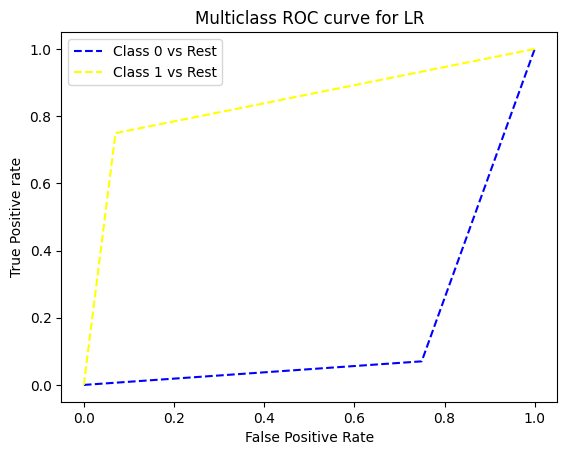

In [132]:
roc(y_test, y_prediction)

##Decision Tree with undersampling and pca

In [133]:
grid_result = DT(x_train_downsampled_pca, y_train_dres)

In [134]:
results(grid_result)

Best: 0.884119 using {'max_depth': 9, 'min_samples_split': 4}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 4}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 10}
0.852342 (0.002970) with: {'max_depth': 3, 'min_samples_split': 20}
0.861943 (0.003829) with: {'max_depth': 4, 'min_samples_split': 4}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 10}
0.862011 (0.003922) with: {'max_depth': 4, 'min_samples_split': 20}
0.867216 (0.005155) with: {'max_depth': 5, 'min_samples_split': 4}
0.867081 (0.005120) with: {'max_depth': 5, 'min_samples_split': 10}
0.867013 (0.005053) with: {'max_depth': 5, 'min_samples_split': 20}
0.871206 (0.003341) with: {'max_depth': 6, 'min_samples_split': 4}
0.871070 (0.003433) with: {'max_depth': 6, 'min_samples_split': 10}
0.870800 (0.003857) with: {'max_depth': 6, 'min_samples_split': 20}
0.878981 (0.005500) with: {'max_depth': 7, 'min_samples_split': 4}
0.878643 (0.005655) with: {'max_depth': 7, 'min_samples_spl

In [135]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',DTresult['DT4'])

Analysis of the Algorithm:

[[3801  430]
 [ 316  777]]
[[3801  430]
 [ 316  777]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91      4231
           1       0.64      0.71      0.68      1093

    accuracy                           0.86      5324
   macro avg       0.78      0.80      0.79      5324
weighted avg       0.87      0.86      0.86      5324

Accuracy: 0.8598797896318557
Precision: 0.8658645810636207
Recall: 0.8598797896318557
F1 Score: 0.8623955955963916
testing class 1 recall Score: 0.7108874656907593


In [136]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7584670231729055


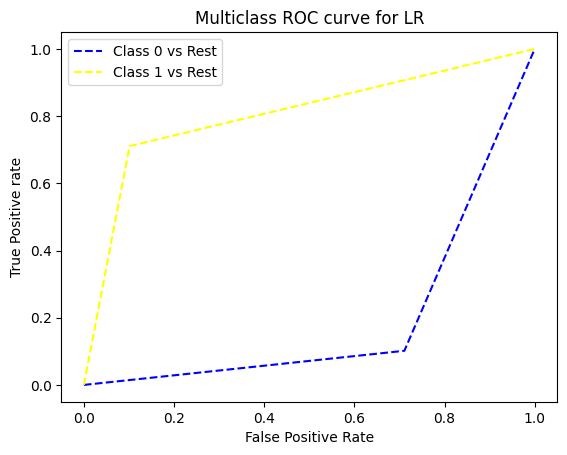

In [137]:
roc(y_test, y_prediction)

##Decision Tree with upsampling

In [138]:
def DT(x_train, y_train):
  model = DecisionTreeClassifier(criterion="gini")
  max_depth = [3, 4, 5, 6, 7, 8, 9, 10, 11]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [139]:
grid_result = DT(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [140]:
results(grid_result)

Best: 0.872204 using {'max_depth': 11, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 4}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 10}
0.818182 (0.010597) with: {'max_depth': 3, 'min_samples_split': 20}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 4}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 10}
0.830616 (0.004100) with: {'max_depth': 4, 'min_samples_split': 20}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 4}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 10}
0.838648 (0.003446) with: {'max_depth': 5, 'min_samples_split': 20}
0.847275 (0.005494) with: {'max_depth': 6, 'min_samples_split': 4}
0.847275 (0.005494) with: {'max_depth': 6, 'min_samples_split': 10}
0.847156 (0.005602) with: {'max_depth': 6, 'min_samples_split': 20}
0.853760 (0.004072) with: {'max_depth': 7, 'min_samples_split': 4}
0.853760 (0.004126) with: {'max_depth': 7, 'min_samples_sp

In [141]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
DTresult['DT5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT5'])

Analysis of the Algorithm:

[[4078  153]
 [ 287  806]]
[[4078  153]
 [ 287  806]]
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      4231
           1       0.84      0.74      0.79      1093

    accuracy                           0.92      5324
   macro avg       0.89      0.85      0.87      5324
weighted avg       0.91      0.92      0.92      5324

Accuracy: 0.9173553719008265
Precision: 0.9149947443806342
Recall: 0.9173553719008265
F1 Score: 0.9153010951087726
Class 1 recall score for test data: 0.737419945105215


In [142]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8014635887672537


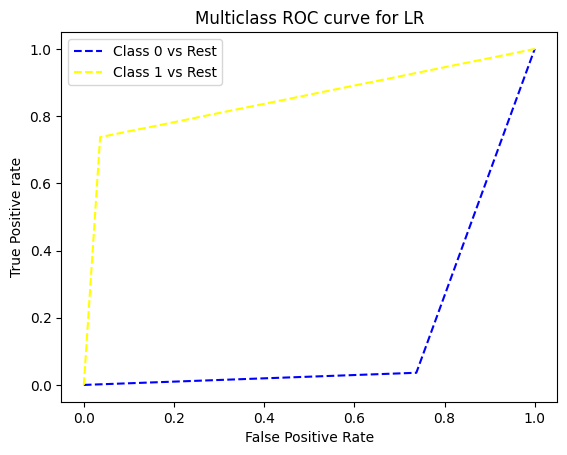

In [143]:
roc(y_test, y_prediction)

##Decision Tree with upsampling and pca

In [144]:
grid_result = DT(X_train_upsampled_pca, y_train_ures_SMOTE)

In [145]:
results(grid_result)

Best: 0.841356 using {'max_depth': 11, 'min_samples_split': 4}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 4}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 10}
0.771270 (0.006871) with: {'max_depth': 3, 'min_samples_split': 20}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 4}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 10}
0.780551 (0.005410) with: {'max_depth': 4, 'min_samples_split': 20}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 4}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 10}
0.796585 (0.003670) with: {'max_depth': 5, 'min_samples_split': 20}
0.805271 (0.004124) with: {'max_depth': 6, 'min_samples_split': 4}
0.805182 (0.004096) with: {'max_depth': 6, 'min_samples_split': 10}
0.805123 (0.004274) with: {'max_depth': 6, 'min_samples_split': 20}
0.813749 (0.003007) with: {'max_depth': 7, 'min_samples_split': 4}
0.813571 (0.002883) with: {'max_depth': 7, 'min_samples_sp

In [146]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
DTresult['DT6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", DTresult['DT6'])

Analysis of the Algorithm:

[[3892  339]
 [ 347  746]]
[[3892  339]
 [ 347  746]]
              precision    recall  f1-score   support

           0       0.92      0.92      0.92      4231
           1       0.69      0.68      0.69      1093

    accuracy                           0.87      5324
   macro avg       0.80      0.80      0.80      5324
weighted avg       0.87      0.87      0.87      5324

Accuracy: 0.8711495116453795
Precision: 0.8708030301016969
Recall: 0.8711495116453795
F1 Score: 0.8709737219196954
Class 1 recall score for test data: 0.6825251601097896


In [147]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.8089600190385531


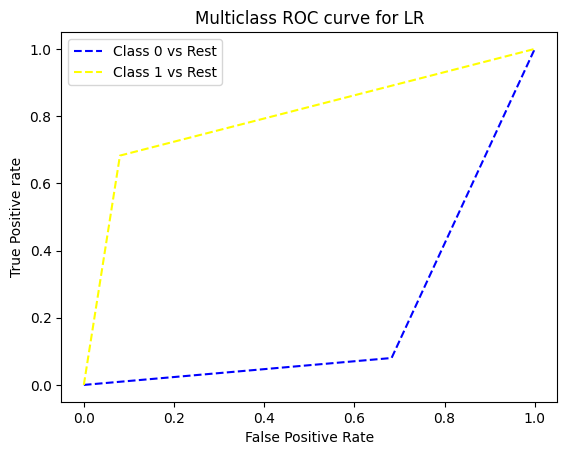

In [148]:
roc(y_test, y_prediction)

##Decision Tree with selected Features

In [149]:
grid_result = DT(featureSelectedTrain, y_train)

In [150]:
results(grid_result)

Best: 0.928484 using {'max_depth': 8, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 4}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 10}
0.889369 (0.005826) with: {'max_depth': 3, 'min_samples_split': 20}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 4}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 10}
0.906649 (0.006064) with: {'max_depth': 4, 'min_samples_split': 20}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 4}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 10}
0.921816 (0.005087) with: {'max_depth': 5, 'min_samples_split': 20}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 4}
0.925995 (0.006045) with: {'max_depth': 6, 'min_samples_split': 10}
0.925807 (0.006188) with: {'max_depth': 6, 'min_samples_split': 20}
0.926606 (0.005897) with: {'max_depth': 7, 'min_samples_split': 4}
0.926606 (0.005859) with: {'max_depth': 7, 'min_samples_spl

In [151]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
DTresult['DT7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',DTresult['DT7'])

Analysis of the Algorithm:

[[4212   19]
 [ 328  765]]
[[4212   19]
 [ 328  765]]
              precision    recall  f1-score   support

           0       0.93      1.00      0.96      4231
           1       0.98      0.70      0.82      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.85      0.89      5324
weighted avg       0.94      0.93      0.93      5324

Accuracy: 0.9348234410217882
Precision: 0.937610012897582
Recall: 0.9348234410217882
F1 Score: 0.9306066914724123
testing recall Score for class1: 0.6999085086916743


In [152]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.696301247771836


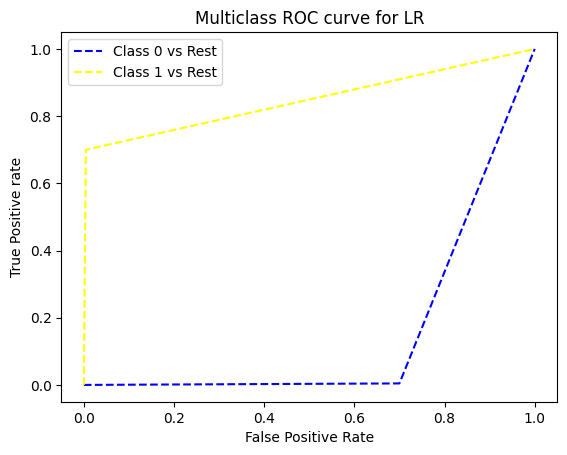

In [153]:
roc(y_test, y_prediction)

##Decision Tree Comparision

In [154]:
DTresult

{'DT1': 0.7008234217749314,
 'DT2': 0.17840805123513268,
 'DT3': 0.7493138151875571,
 'DT4': 0.7108874656907593,
 'DT5': 0.737419945105215,
 'DT6': 0.6825251601097896,
 'DT7': 0.6999085086916743}

In [155]:
resultDic['Decision Tree'] = 0.7465690759377859#DT3, {'max_depth': 9, 'min_samples_split': 20}

#Random Forest with gridsearchCV

In [156]:
from sklearn.ensemble import RandomForestClassifier

In [157]:
def RF(x_train, y_train):
  model = RandomForestClassifier()
  n_estimators= [ 10, 50, 100]
  max_depth = [3, 4, 5, 6, 7]
  min_samples_split = [4, 10, 20]
  # define grid search
  grid = dict(n_estimators=n_estimators,min_samples_split=min_samples_split,max_depth=max_depth)
  grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=5)
  grid_result = grid_search.fit(x_train, y_train)
  return grid_result

In [158]:
RFresult = {}

##Random Forest without resampling

In [159]:
grid_result = RF(x_train, y_train)

In [160]:
results(grid_result)

Best: 0.921253 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 100}
0.847342 (0.012504) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.869178 (0.009324) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.867815 (0.013922) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.871150 (0.021067) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.870633 (0.015955) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.859409 (0.014733) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.854434 (0.018589) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.851333 (0.007255) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.847389 (0.008778) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.878990 (0.021644) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.896741 (0.012973) with: {'max_depth

In [161]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF1']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',RFresult['RF1'])

Analysis of the Algorithm:

[[4210   21]
 [ 378  715]]
[[4210   21]
 [ 378  715]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.95      4231
           1       0.97      0.65      0.78      1093

    accuracy                           0.93      5324
   macro avg       0.94      0.82      0.87      5324
weighted avg       0.93      0.93      0.92      5324

Accuracy: 0.9250563486100676
Precision: 0.9286676699356686
Recall: 0.9250563486100676
F1 Score: 0.9192591631137206
testing recall Score for class1: 0.6541628545288197


In [162]:
y_pre = grid_result.predict(x_train)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.6566399286987522


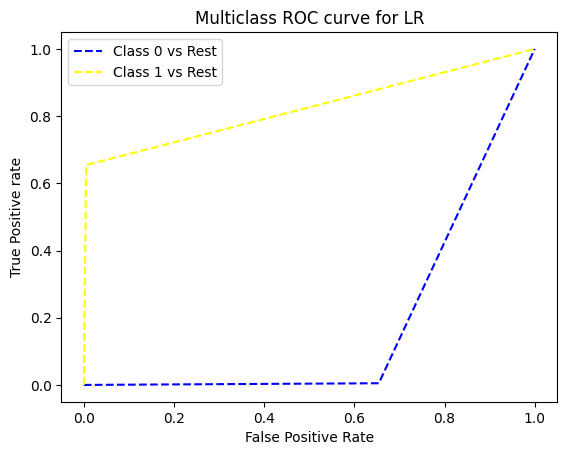

In [163]:
roc(y_test, y_prediction)

##Random Forest without resampling and pca

In [164]:
grid_result = RF(x_train_pca, y_train)

In [165]:
results(grid_result)

Best: 0.895144 using {'max_depth': 7, 'min_samples_split': 20, 'n_estimators': 100}
0.837247 (0.009564) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.833443 (0.004470) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.829405 (0.004087) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.831330 (0.009158) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.828794 (0.002796) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.831142 (0.003121) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.828418 (0.006625) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.830626 (0.004089) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.832175 (0.003976) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.852649 (0.006530) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.856264 (0.003348) with: {'max_depth

In [166]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF2']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score on test data:", RFresult['RF2'])

Analysis of the Algorithm:

[[4118  113]
 [1010   83]]
[[4118  113]
 [1010   83]]
              precision    recall  f1-score   support

           0       0.80      0.97      0.88      4231
           1       0.42      0.08      0.13      1093

    accuracy                           0.79      5324
   macro avg       0.61      0.52      0.50      5324
weighted avg       0.73      0.79      0.73      5324

Accuracy: 0.7890683696468821
Precision: 0.7251170656771226
Recall: 0.7890683696468821
F1 Score: 0.7257841649047647
Class 1 recall score on test data: 0.07593778591033852


In [167]:
y_pre = grid_result.predict(x_train_pca)
print('training accuracy Score:',recall_score(y_train, y_pre))

training accuracy Score: 0.5866755793226381


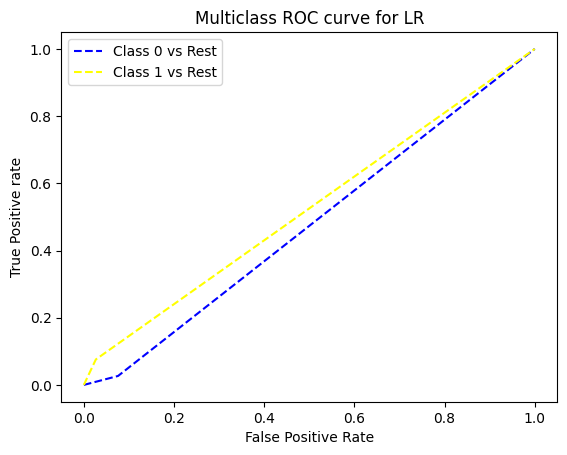

In [168]:
roc(y_test, y_prediction)

##Random Forest with undersampling

In [169]:
grid_result = RF(x_train_dres, y_train_dres)

In [170]:
results(grid_result)

Best: 0.904401 using {'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50}
0.857479 (0.022728) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.858427 (0.011488) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.859846 (0.014113) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.850452 (0.028999) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.866945 (0.016840) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.864308 (0.011135) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.854438 (0.030240) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.859846 (0.012357) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.868907 (0.006156) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.873776 (0.010615) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.885742 (0.005836) with: {'max_depth'

In [171]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF3']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score:',RFresult['RF3'])

Analysis of the Algorithm:

[[3911  320]
 [ 298  795]]
[[3911  320]
 [ 298  795]]
              precision    recall  f1-score   support

           0       0.93      0.92      0.93      4231
           1       0.71      0.73      0.72      1093

    accuracy                           0.88      5324
   macro avg       0.82      0.83      0.82      5324
weighted avg       0.88      0.88      0.88      5324

Accuracy: 0.8839218632607062
Precision: 0.8848152304113422
Recall: 0.8839218632607062
F1 Score: 0.8843488644085009
testing recall Score: 0.727355901189387


In [172]:
y_pre = grid_result.predict(x_train_dres)
print('training recall Score for class 1:',recall_score(y_train_dres, y_pre, average=None)[1])

training recall Score for class 1: 0.7344028520499108


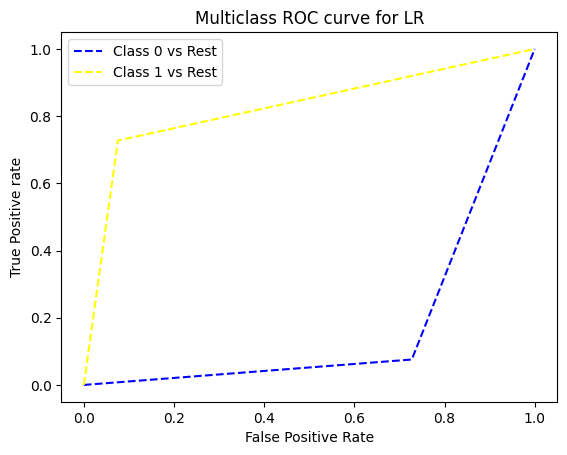

In [173]:
roc(y_test, y_prediction)

##Random Forest with undersampling and pca

In [174]:
grid_result = RF(x_train_downsampled_pca, y_train_dres)

In [175]:
results(grid_result)

Best: 0.896762 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.813130 (0.005875) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.823744 (0.006716) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.821040 (0.006517) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.823879 (0.013424) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.822189 (0.012026) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.827868 (0.010054) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.822594 (0.010722) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.822190 (0.010114) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.817997 (0.009081) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.853153 (0.013661) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.856602 (0.007186) with: {'max_depth'

In [176]:
y_prediction = grid_result.predict(x_test_downsampled_transformed_pca)
scores(y_test, y_prediction)
RFresult['RF4']= recall_score(y_test, y_prediction, average=None)[1]
print('testing class 1 recall Score:',RFresult['RF4'])

Analysis of the Algorithm:

[[3868  363]
 [ 342  751]]
[[3868  363]
 [ 342  751]]
              precision    recall  f1-score   support

           0       0.92      0.91      0.92      4231
           1       0.67      0.69      0.68      1093

    accuracy                           0.87      5324
   macro avg       0.80      0.80      0.80      5324
weighted avg       0.87      0.87      0.87      5324

Accuracy: 0.8675807663410969
Precision: 0.8685456367760671
Recall: 0.8675807663410969
F1 Score: 0.8680460426438138
testing class 1 recall Score: 0.687099725526075


In [177]:
y_pre = grid_result.predict(x_train_downsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_dres, y_pre, average=None)[1])

training class 1 recall Score: 0.7232620320855615


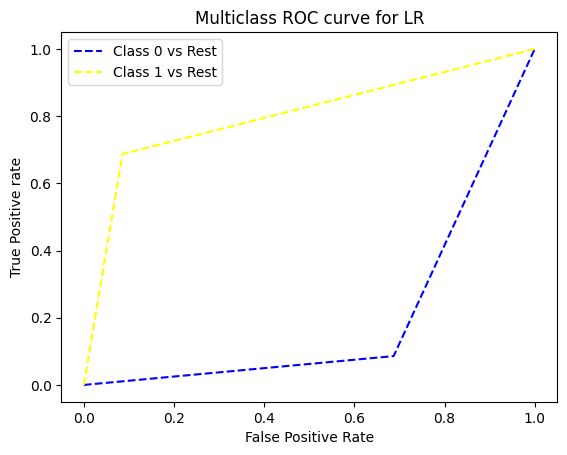

In [178]:
roc(y_test, y_prediction)

##Random Forest with upsampling

In [179]:
grid_result = RF(x_train_ures_SMOTE, y_train_ures_SMOTE)

In [180]:
results(grid_result)

Best: 0.847275 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.806907 (0.009474) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.812381 (0.009541) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.810953 (0.007427) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.806462 (0.006324) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.810805 (0.004883) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.811221 (0.006473) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.812321 (0.013042) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.811757 (0.008114) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.810448 (0.005709) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.813363 (0.013085) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.816129 (0.006107) with: {'max_depth':

In [181]:
y_prediction = grid_result.predict(x_test)
scores(y_test, y_prediction)
RFresult['RF5']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", RFresult['RF5'])

Analysis of the Algorithm:

[[3932  299]
 [ 285  808]]
[[3932  299]
 [ 285  808]]
              precision    recall  f1-score   support

           0       0.93      0.93      0.93      4231
           1       0.73      0.74      0.73      1093

    accuracy                           0.89      5324
   macro avg       0.83      0.83      0.83      5324
weighted avg       0.89      0.89      0.89      5324

Accuracy: 0.8903080390683696
Precision: 0.8908405749218679
Recall: 0.8903080390683696
F1 Score: 0.8905661683514331
Class 1 recall score for test data: 0.7392497712717292


In [182]:
y_pre = grid_result.predict(x_train_ures_SMOTE)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7668967158495954


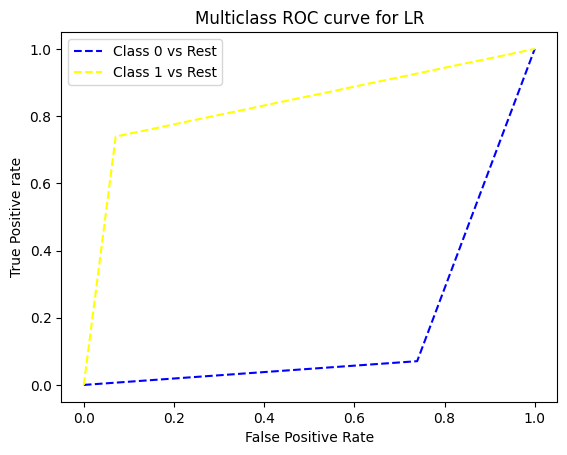

In [183]:
roc(y_test, y_prediction)

##Random Forest with upsampling and pca

In [184]:
grid_result = RF(X_train_upsampled_pca, y_train_ures_SMOTE)

In [185]:
results(grid_result)

Best: 0.831331 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 100}
0.773620 (0.011507) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.782098 (0.009511) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.780878 (0.005477) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.774156 (0.009174) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.779688 (0.009161) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.779034 (0.005435) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.774840 (0.009131) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.782872 (0.007888) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.780283 (0.004101) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.791260 (0.005952) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.796734 (0.007348) with: {'max_depth'

In [186]:
y_prediction = grid_result.predict(X_test_upsampled_transformed_pca)
scores(y_test, y_prediction)
RFresult['RF6']= recall_score(y_test, y_prediction, average=None)[1]
print("Class 1 recall score for test data:", RFresult['RF6'])

Analysis of the Algorithm:

[[3772  459]
 [ 297  796]]
[[3772  459]
 [ 297  796]]
              precision    recall  f1-score   support

           0       0.93      0.89      0.91      4231
           1       0.63      0.73      0.68      1093

    accuracy                           0.86      5324
   macro avg       0.78      0.81      0.79      5324
weighted avg       0.87      0.86      0.86      5324

Accuracy: 0.8580015026296018
Precision: 0.8669092553492954
Recall: 0.8580015026296018
F1 Score: 0.8615143194623964
Class 1 recall score for test data: 0.7282708142726441


In [187]:
y_pre = grid_result.predict(X_train_upsampled_pca)
print('training class 1 recall Score:',recall_score(y_train_ures_SMOTE, y_pre, average=None)[1])

training class 1 recall Score: 0.7730842455973346


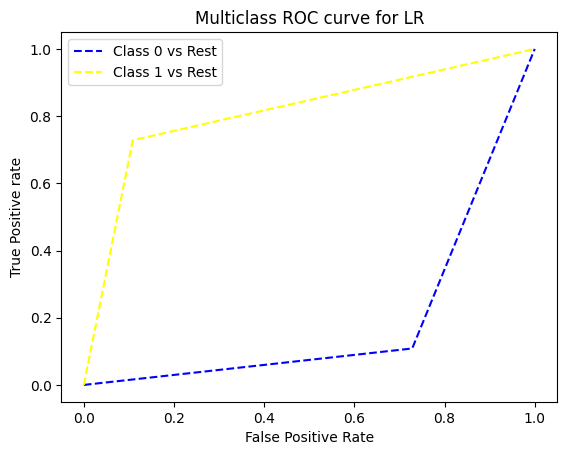

In [188]:
roc(y_test, y_prediction)

##Random Forest without resampling

In [189]:
grid_result = RF(featureSelectedTrain, y_train)

In [190]:
results(grid_result)

Best: 0.925009 using {'max_depth': 7, 'min_samples_split': 4, 'n_estimators': 50}
0.878850 (0.018175) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 10}
0.893031 (0.002259) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 50}
0.882560 (0.011768) with: {'max_depth': 3, 'min_samples_split': 4, 'n_estimators': 100}
0.860444 (0.010718) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 10}
0.881574 (0.010069) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 50}
0.884862 (0.010247) with: {'max_depth': 3, 'min_samples_split': 10, 'n_estimators': 100}
0.882889 (0.010006) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 10}
0.881433 (0.007640) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 50}
0.894112 (0.006165) with: {'max_depth': 3, 'min_samples_split': 20, 'n_estimators': 100}
0.900310 (0.005970) with: {'max_depth': 4, 'min_samples_split': 4, 'n_estimators': 10}
0.905287 (0.007618) with: {'max_depth':

In [191]:
y_prediction = grid_result.predict(featureSelectedTest)
scores(y_test, y_prediction)
RFresult['RF7']= recall_score(y_test, y_prediction, average=None)[1]
print('testing recall Score for class1:',RFresult['RF7'])

Analysis of the Algorithm:

[[4210   21]
 [ 369  724]]
[[4210   21]
 [ 369  724]]
              precision    recall  f1-score   support

           0       0.92      1.00      0.96      4231
           1       0.97      0.66      0.79      1093

    accuracy                           0.93      5324
   macro avg       0.95      0.83      0.87      5324
weighted avg       0.93      0.93      0.92      5324

Accuracy: 0.9267468069120962
Precision: 0.9301717283406692
Recall: 0.9267468069120962
F1 Score: 0.9212588363706361
testing recall Score for class1: 0.6623970722781336


In [192]:
y_pre = grid_result.predict(featureSelectedTrain)
print('training recall Score for class1:',recall_score(y_train, y_pre, average=None)[1])

training recall Score for class1: 0.6657754010695187


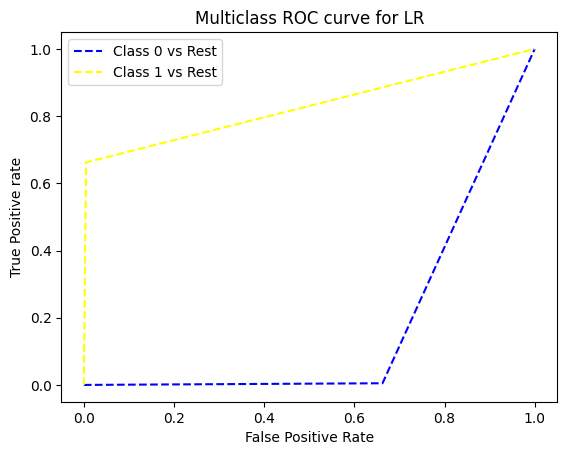

In [193]:
roc(y_test, y_prediction)

##Random Forest Comparision

In [194]:
RFresult

{'RF1': 0.6541628545288197,
 'RF2': 0.07593778591033852,
 'RF3': 0.727355901189387,
 'RF4': 0.687099725526075,
 'RF5': 0.7392497712717292,
 'RF6': 0.7282708142726441,
 'RF7': 0.6623970722781336}

In [195]:
resultDic['Random Forest'] = 0.7319304666056725 #'max_depth': 7, 'min_samples_split': 10, 'n_estimators': 50